In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms, datasets

from PIL import Image
import json

In [4]:
import matplotlib.pyplot as plt

In [6]:
model = models.resnet101(pretrained=True)
model.eval()
# print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
CLASSES = json.load(open('imagenet_classes.json'))
idx2class = [CLASSES[str(i)] for i in range(1000)]

In [9]:
!wget -O schuna.jpg https://1.bp.blogspot.com/-1g6Gf_NtiQw/V0ahj_nQgGI/AAAAAAAAPcs/T9wbtXSXaAwo2MccYaTv27QZqFgv4MRvwCLcB/s640/1.png

--2020-08-16 17:20:50--  https://1.bp.blogspot.com/-1g6Gf_NtiQw/V0ahj_nQgGI/AAAAAAAAPcs/T9wbtXSXaAwo2MccYaTv27QZqFgv4MRvwCLcB/s640/1.png
Resolving 1.bp.blogspot.com (1.bp.blogspot.com)... 172.217.175.65, 2404:6800:4004:813::2001
접속 1.bp.blogspot.com (1.bp.blogspot.com)|172.217.175.65|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 609543 (595K) [image/png]
Saving to: ‘schuna.jpg’

schuna.jpg          100%[===================>] 595.26K  3.37MB/s    in 0.2s    

2020-08-16 17:20:50 (3.37 MB/s) - ‘schuna.jpg’ saved [609543/609543]



In [10]:
img = Image.open('schuna.jpg')

In [11]:
img_transforms = transforms.Compose([
    transforms.Resize((224, 224), Image.BICUBIC),
    transforms.ToTensor()
])

img_tensor = img_transforms(img)
img_tensor = img_tensor.unsqueeze(0)

print(f"Image Tensor : {img_tensor.size()}")

Image Tensor : torch.Size([1, 3, 224, 224])


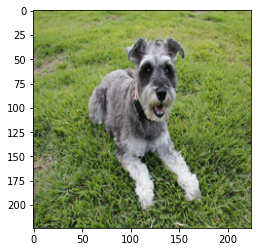

In [12]:
original_img_view = img_tensor.squeeze(0).detach()
original_img_view = original_img_view.transpose(0, 2).transpose(0, 1).numpy()
plt.imshow(original_img_view)

In [13]:
output = model(img_tensor)
prediction = output.max(1, keepdim=False)[1]

prediction_idx = prediction.item()
prediction_name = idx2class[prediction_idx]

print(f"Predicted No.{[prediction_idx]}")
print(f"Predicted Name : {prediction_name}")

Predicted No.[196]
Predicted Name : miniature schnauzer
